Graph of Interpersonal Violence vs Alcohol Consumption and Correlation

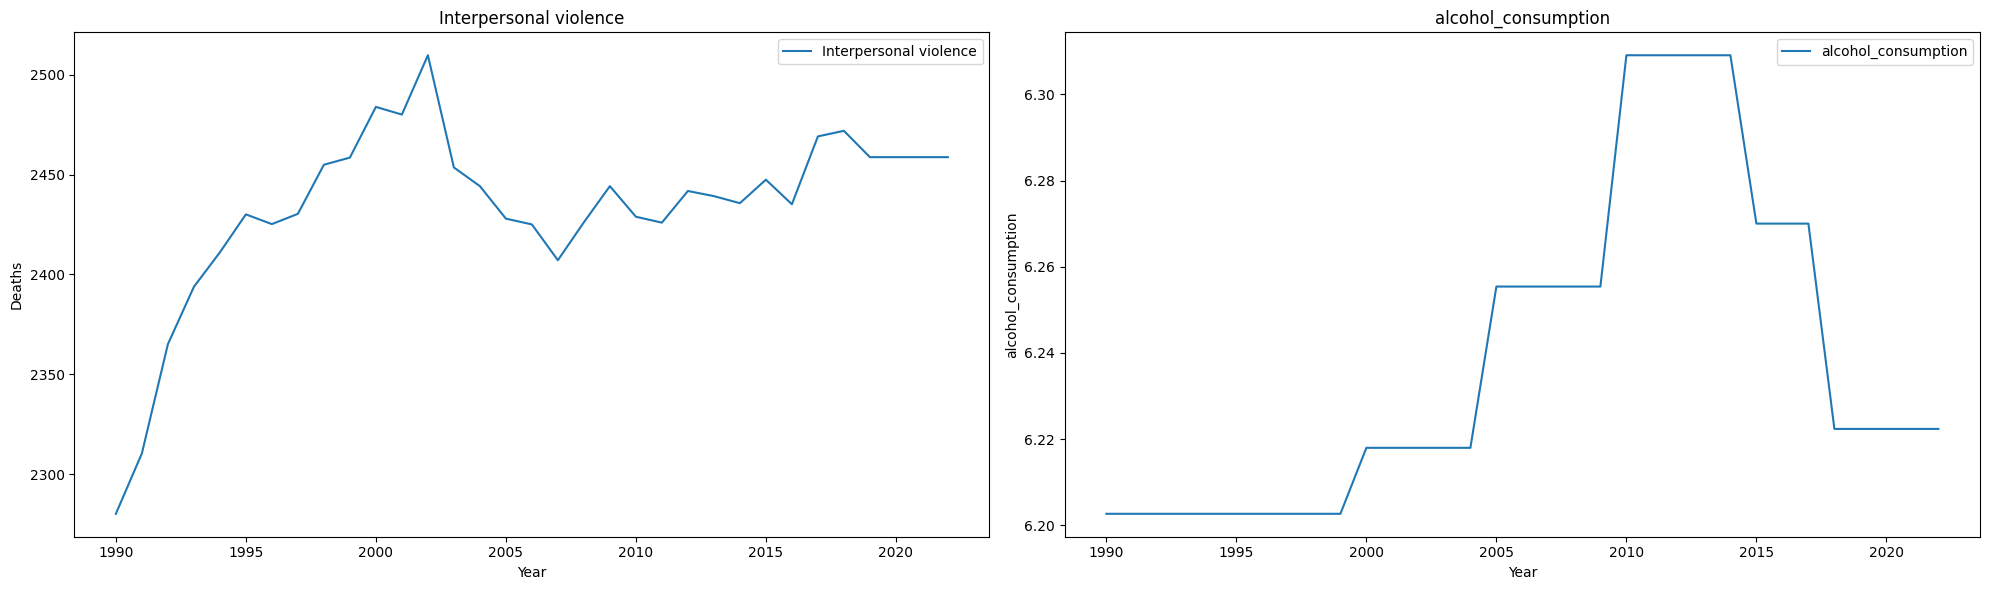

Spearman correlation: -0.06746954739392529


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Dataset19.csv", index_col=1)
df['Alcohol use disorders'] = pd.to_numeric(df['Alcohol use disorders'], errors='coerce')  # Convert CO2 emissions to numeric
df['Interpersonal violence'] = pd.to_numeric(df['Interpersonal violence'], errors='coerce')  # Convert Fire/Heat data to numeric

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns

# Plot for alcohol use disorder deaths
average_co2 = df.groupby('Year')[['Interpersonal violence']].mean()
axs[0].plot(average_co2.index, average_co2['Interpersonal violence'], label='Interpersonal violence')
axs[0].set_title('Interpersonal violence')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Deaths')
axs[0].legend()

# Plot for Fire, Heat, and Hot Substances
average_fire_heat = df.groupby('Year')[['alcohol_consumption']].mean()
axs[1].plot(average_fire_heat.index, average_fire_heat['alcohol_consumption'], label='alcohol_consumption')
axs[1].set_title('alcohol_consumption')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('alcohol_consumption')
axs[1].legend()

plt.tight_layout()
plt.show()

import pandas as pd

# Calculating Pearson Correlation between alcohol consumption and interpersonal violence
df = pd.read_csv("Dataset19.csv", index_col=1)
df['alcohol_consumption'] = pd.to_numeric(df['alcohol_consumption'], errors='coerce')  # Convert to numeric, handling errors
df['Interpersonal violence'] = pd.to_numeric(df['Interpersonal violence'], errors='coerce')  # Convert to numeric, handling errors

# Calculate Spearman correlation
correlation_spearman = df['Interpersonal violence'].corr(df['alcohol_consumption'], method='spearman')

print("Spearman correlation:", correlation_spearman)


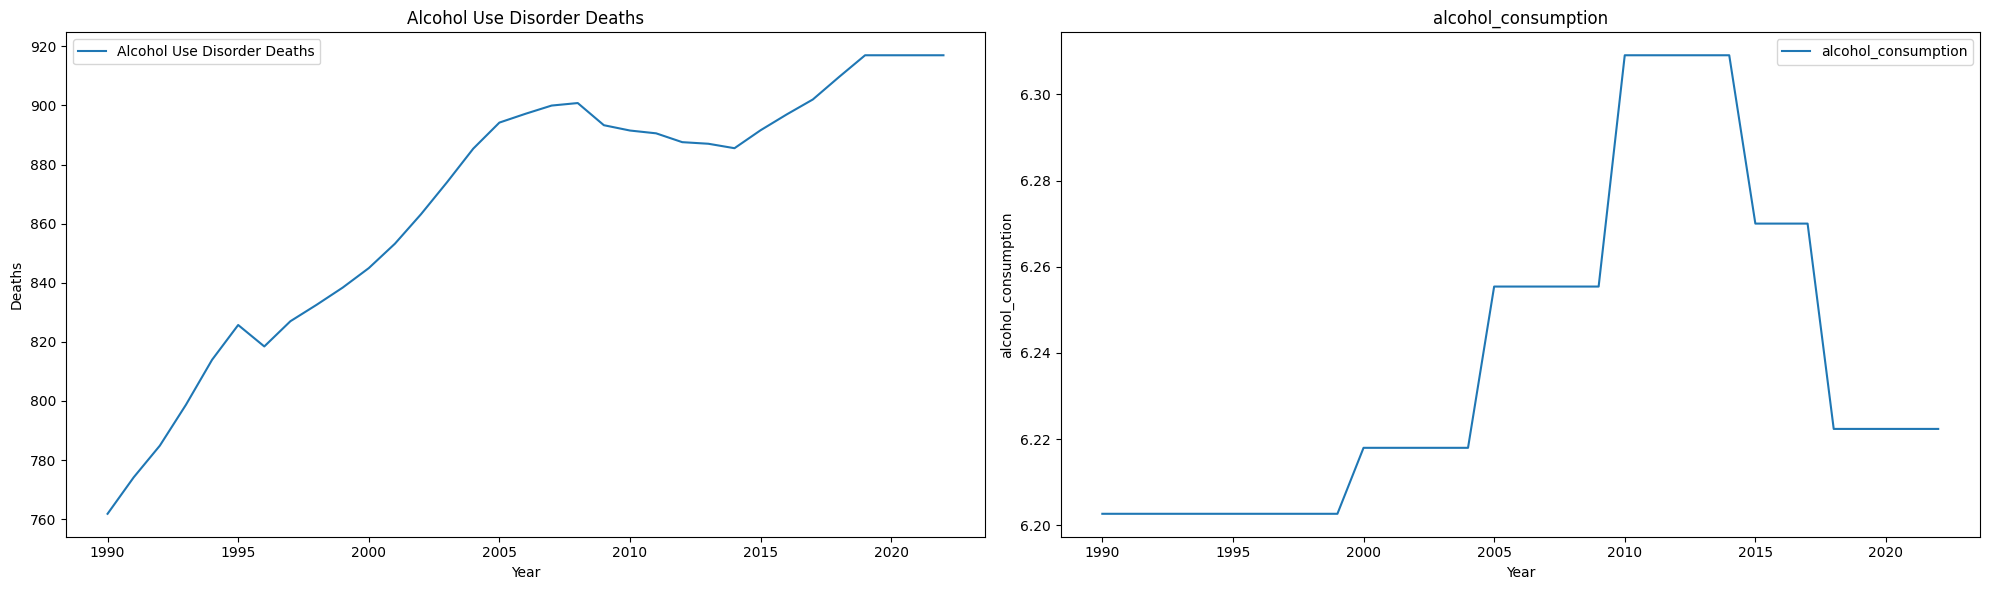

Spearman correlation: 0.19969024145836609


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Dataset19.csv", index_col=1)
df['Alcohol use disorders'] = pd.to_numeric(df['Alcohol use disorders'], errors='coerce')  # Convert CO2 emissions to numeric
df['Exposure to forces of nature'] = pd.to_numeric(df['Exposure to forces of nature'], errors='coerce')  # Convert Fire/Heat data to numeric

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns

# Plot for alcohol use disorder deaths
average_co2 = df.groupby('Year')[['Alcohol use disorders']].mean()
axs[0].plot(average_co2.index, average_co2['Alcohol use disorders'], label='Alcohol Use Disorder Deaths')
axs[0].set_title('Alcohol Use Disorder Deaths')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Deaths')
axs[0].legend()

# Plot for Fire, Heat, and Hot Substances
average_fire_heat = df.groupby('Year')[['alcohol_consumption']].mean()
axs[1].plot(average_fire_heat.index, average_fire_heat['alcohol_consumption'], label='alcohol_consumption')
axs[1].set_title('alcohol_consumption')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('alcohol_consumption')
axs[1].legend()

plt.tight_layout()
plt.show()

#Checking correlation between alcohol use disorder deaths and alcohol consumption
df = pd.read_csv("Dataset19.csv", index_col=1)
df['alcohol_consumption'] = pd.to_numeric(df['alcohol_consumption'], errors='coerce')  # Convert to numeric, handling errors
df['Alcohol use disorders'] = pd.to_numeric(df['Alcohol use disorders'], errors='coerce')  # Convert to numeric, handling errors

# Calculate Spearman correlation
correlation_spearman = df['Alcohol use disorders'].corr(df['alcohol_consumption'], method='spearman')

print("Spearman correlation:", correlation_spearman)

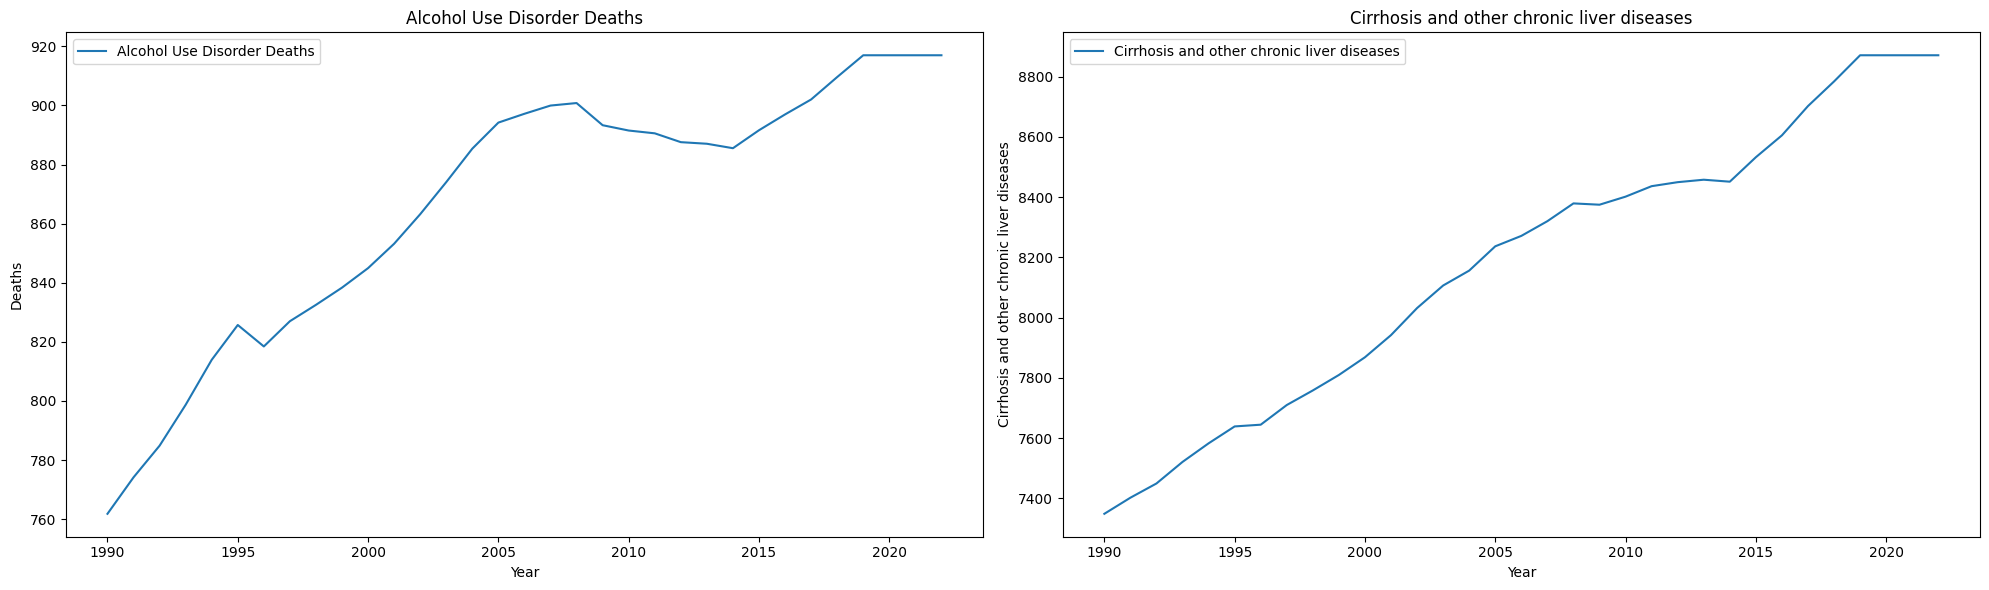

Spearman correlation: 0.8912515562042307


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Dataset19.csv", index_col=1)
df['Alcohol use disorders'] = pd.to_numeric(df['Alcohol use disorders'], errors='coerce')  # Convert CO2 emissions to numeric
df['Cirrhosis and other chronic liver diseases'] = pd.to_numeric(df['Cirrhosis and other chronic liver diseases'], errors='coerce')  # Convert Fire/Heat data to numeric

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns

# Plot for alcohol use disorder deaths
average_co2 = df.groupby('Year')[['Alcohol use disorders']].mean()
axs[0].plot(average_co2.index, average_co2['Alcohol use disorders'], label='Alcohol Use Disorder Deaths')
axs[0].set_title('Alcohol Use Disorder Deaths')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Deaths')
axs[0].legend()

# Plot for Cirrhosis and other chronic liver diseases
average_fire_heat = df.groupby('Year')[['Cirrhosis and other chronic liver diseases']].mean()
axs[1].plot(average_fire_heat.index, average_fire_heat['Cirrhosis and other chronic liver diseases'], label='Cirrhosis and other chronic liver diseases')
axs[1].set_title('Cirrhosis and other chronic liver diseases')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Cirrhosis and other chronic liver diseases')
axs[1].legend()

plt.tight_layout()
plt.show()

#Correlation Between Cirrhosis and other chronic liver disease deaths and Alcohol use disorder deaths
df = pd.read_csv("Dataset19.csv", index_col=1)
df['Cirrhosis and other chronic liver diseases'] = pd.to_numeric(df['Cirrhosis and other chronic liver diseases'], errors='coerce')  # Convert to numeric, handling errors
df['Alcohol use disorders'] = pd.to_numeric(df['Alcohol use disorders'], errors='coerce')  # Convert to numeric, handling errors

# Calculate Spearman correlation
correlation_spearman = df['Alcohol use disorders'].corr(df['Cirrhosis and other chronic liver diseases'], method='spearman')

print("Spearman correlation:", correlation_spearman)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as se



Co2 Emissions and Exposure to Forces of Nature

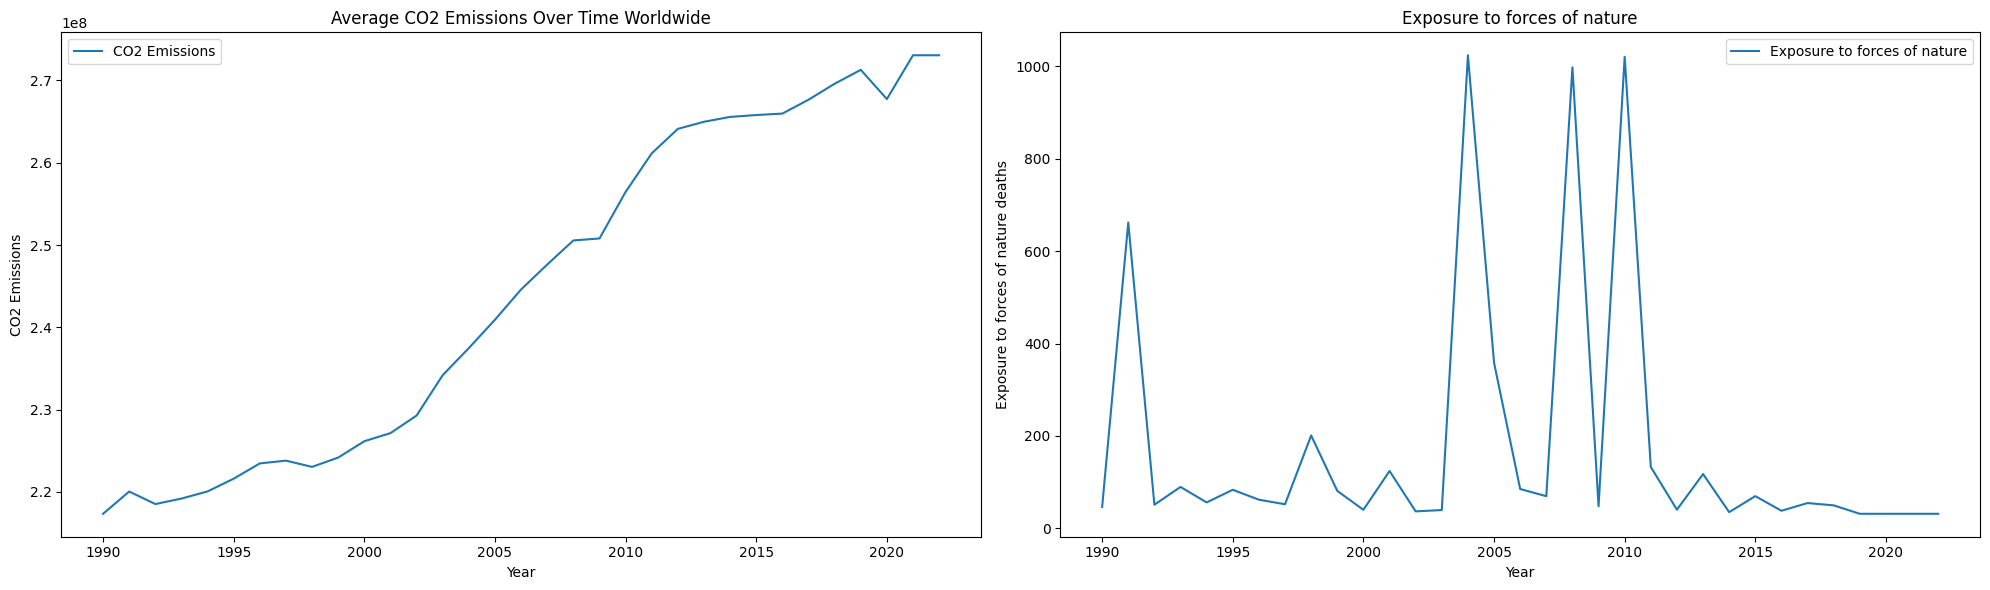

Spearman correlation: 0.36567259177374495


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Dataset19.csv", index_col=1)
df['co2_emissions'] = pd.to_numeric(df['co2_emissions'], errors='coerce')  # Convert CO2 emissions to numeric
df['Exposure to forces of nature'] = pd.to_numeric(df['Exposure to forces of nature'], errors='coerce')  # Convert Fire/Heat data to numeric

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns

# Plot for CO2 Emissions
average_co2 = df.groupby('Year')[['co2_emissions']].mean()
axs[0].plot(average_co2.index, average_co2['co2_emissions'], label='CO2 Emissions')
axs[0].set_title('Average CO2 Emissions Over Time Worldwide')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('CO2 Emissions')
axs[0].legend()

# Plot for Fire, Heat, and Hot Substances
average_fire_heat = df.groupby('Year')[['Exposure to forces of nature']].mean()
axs[1].plot(average_fire_heat.index, average_fire_heat['Exposure to forces of nature'], label='Exposure to forces of nature')
axs[1].set_title('Exposure to forces of nature')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Exposure to forces of nature deaths')
axs[1].legend()

plt.tight_layout()
plt.show()

#Correlation Between Cirrhosis and other chronic liver disease deaths and Alcohol use disorder deaths
# Calculate Spearman correlation
correlation_spearman = df['Exposure to forces of nature'].corr(df['co2_emissions'], method='spearman')

print("Spearman correlation:", correlation_spearman)

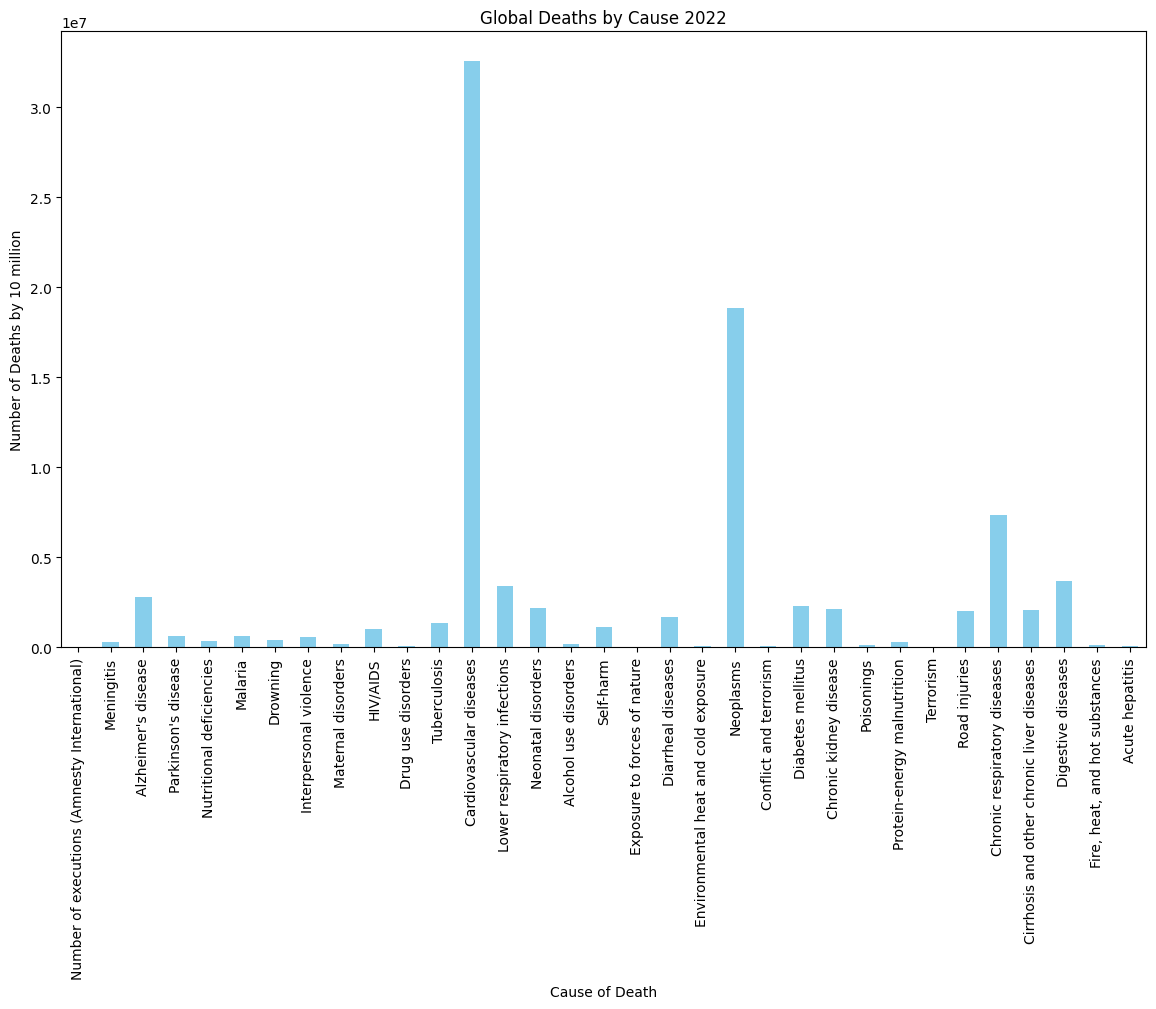

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Dataset19.csv")
df = df[df['Year'] == 2022]
df = df.drop(columns=['Location', 'TPopulation1July', 'PopDensity', 'DoublingTime', 'Births', 'Deaths', 'Code', 'co2_emissions', 'alcohol_consumption', 'Year'], axis=1)


# Convert columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df_sum = df.sum()
df_sum.plot(kind='bar', figsize = (14, 8), color='skyblue')

plt.title('Global Deaths by Cause 2022')
plt.xlabel('Cause of Death')
plt.ylabel('Number of Deaths by 10 million')
plt.xticks(rotation=90)  # Rotate the labels to make them readable

plt.show()

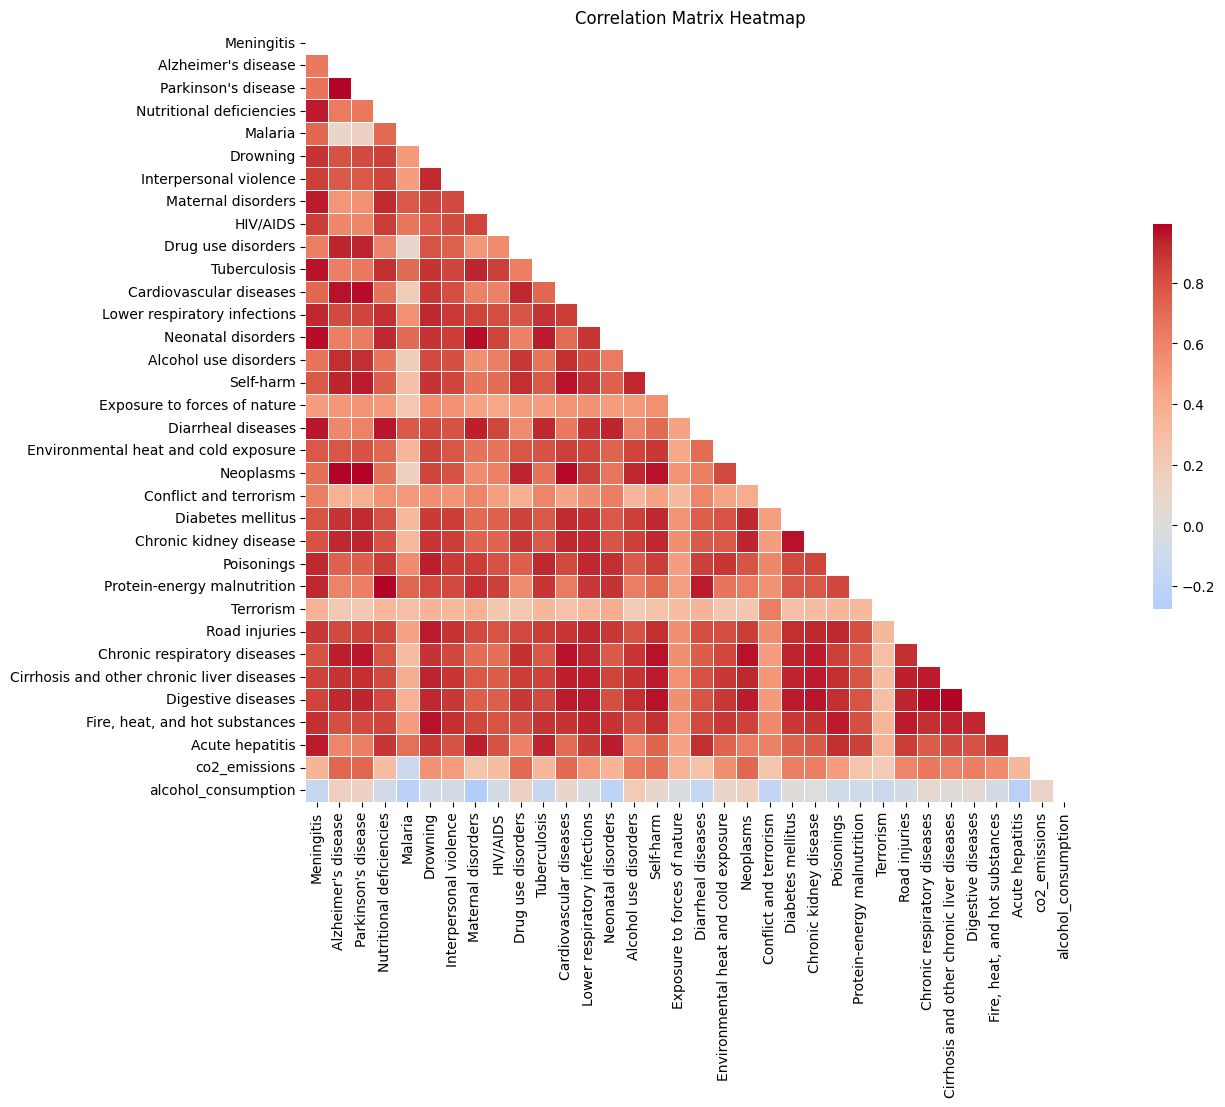

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("Dataset19.csv", index_col=1)
df = df.drop(columns=['Location', 'TPopulation1July', 'DoublingTime','Births','Deaths', 'Code', 'Number of executions (Amnesty International)', 'PopDensity'], axis=1)

corr_matrix = df.corr(method='spearman')
plt.figure(figsize=(20, 10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Convert columns to numeric
for col in df.columns:
    if col != 'Year':  # Assuming 'Year' is already of the correct type
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5})

# Customize the plot with labels and a title as needed
plt.title('Correlation Matrix Heatmap')
plt.show()

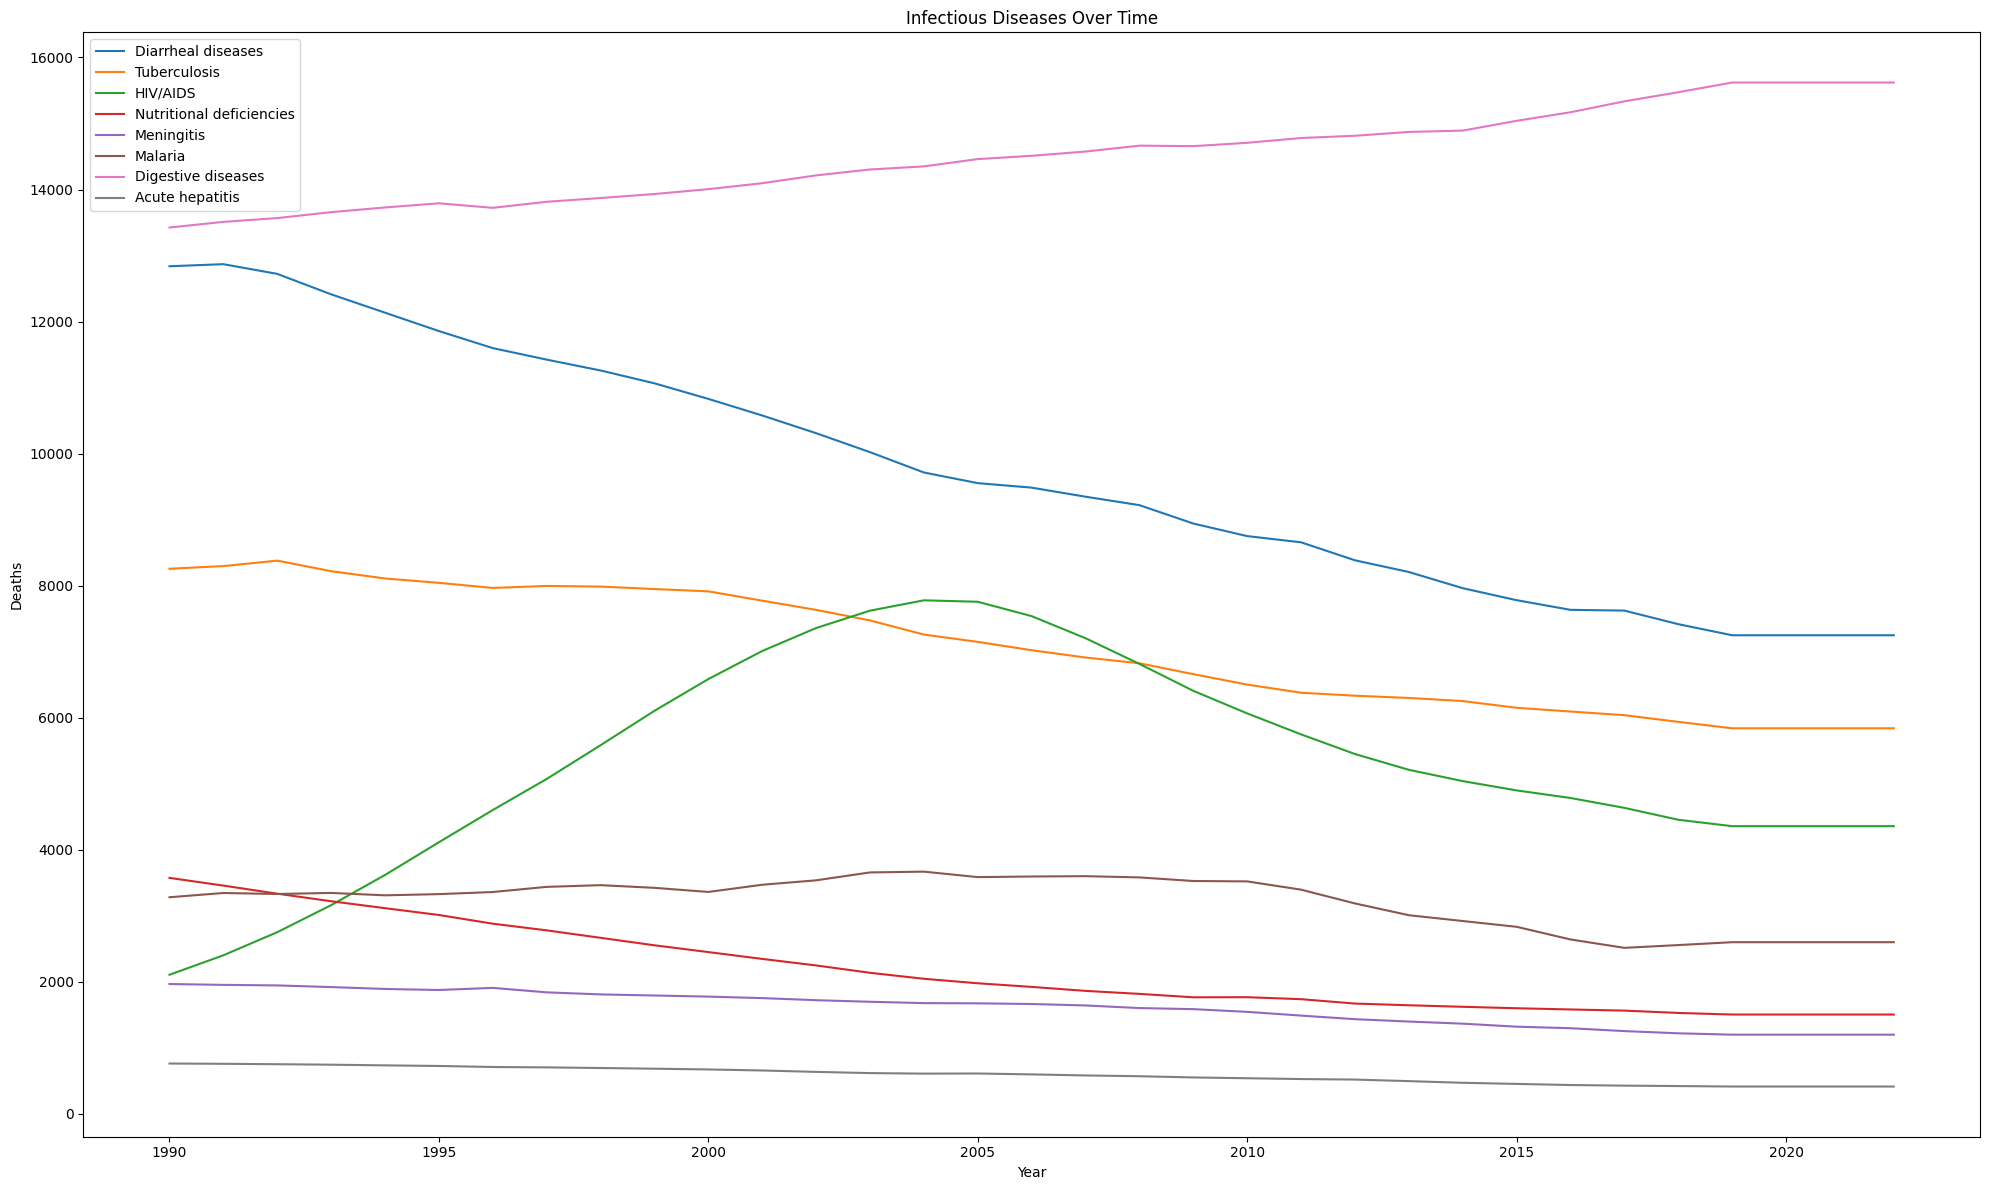

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Dataset19.csv", index_col=1)

# Dropping specified columns
df = df.drop(columns=['Location', 'TPopulation1July', 'PopDensity', 'DoublingTime', 'Births', 'Deaths', 'Code', 'co2_emissions', 'alcohol_consumption', 'Cardiovascular diseases', 'Parkinson\'s disease', 'Alzheimer\'s disease', 'Alcohol use disorders', 'Chronic kidney disease', 'Chronic respiratory diseases', 'Cirrhosis and other chronic liver diseases', 'Neoplasms', 'Self-harm'], axis=1)
df = df[['Diarrheal diseases', 'Tuberculosis', 'HIV/AIDS', 'Nutritional deficiencies', 'Meningitis', 'Malaria', 'Digestive diseases', 'Acute hepatitis']]
# Convert columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 1, figsize=(20, 12))  # Corrected this line

# Plot for CO2 Emissions
means = df.groupby('Year').mean()
for col in df.columns:
    axs.plot(means.index, means[col], label=col)

axs.set_title('Infectious Diseases Over Time')
axs.set_xlabel('Year')
axs.set_ylabel('Deaths')
axs.legend()

plt.tight_layout()
plt.show()
